<a href="https://colab.research.google.com/github/divyansh351/ML-Bootcamp-WOC/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/cyberlabs/emnist_data2
train_path = '/content/drive/MyDrive/cyberlabs/emnist_data2/emnist-letters-train.csv'
test_path = '/content/drive/MyDrive/cyberlabs/emnist_data2/emnist-letters-test.csv'
df_train = pd.read_csv(train_path, header=None)
df_test = pd.read_csv(test_path, header=None)

/content/drive/MyDrive/cyberlabs/emnist_data2


In [ ]:
print('Loading Data ...\n')
X=df_train.drop([0], axis=1)
X_train=X.to_numpy().astype('float64')
X_train = X_train/255.0
m,n=X_train.shape
X_train = X_train.T
Y_train=df_train[0].to_numpy().astype('int').reshape(1, m)
m1,n1=Y_train.shape
print(X_train,'\nShape -', m, n,'\n')
print(Y_train,'\nShape -', m1, n1)
Y_train = Y_train - 1

Loading Data ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Shape - 64783 784 

[[ 1  1  1 ... 19 19 19]] 
Shape - 1 64783


In [ ]:
print('Loading Data ...\n')
X=df_test.drop([0], axis=1)
X_test=X.to_numpy().astype('float64')
X_test = X_test/255.0
mt,nt=X_test.shape
X_test = X_test.T
Y_test=df_test[0].to_numpy().astype('int').reshape(1, mt)
mt1,nt1=Y_test.shape
print(X_test,'\nShape -', mt, nt,'\n')
print(Y_test, '\nShape -', mt1, nt1)
Y_test = Y_test - 1

Loading Data ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Shape - 14800 784 

[[ 1  1  1 ... 19 19 19]] 
Shape - 1 14800


In [ ]:
def init_params():
    W1 = np.random.rand(19, 784) - 0.5
    b1 = np.random.rand(19, 1) - 0.5
    W2 = np.random.rand(19, 19) - 0.5
    b2 = np.random.rand(19, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 300 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.5, 3000)

Iteration:  0
[11  4 17 ...  5 11 11] [[ 0  0  0 ... 18 18 18]]
0.04729635861259898
Iteration:  10
[ 4 10  2 ...  5  2  2] [[ 0  0  0 ... 18 18 18]]
0.14638099501412408
Iteration:  20
[ 4 10  2 ...  8  2 18] [[ 0  0  0 ... 18 18 18]]
0.26568698578330735
Iteration:  30
[ 4 10  2 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.37597826590309186
Iteration:  40
[13 10  6 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.4514764675918065
Iteration:  50
[14 10  6 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.49759967892811385
Iteration:  60
[ 4 10  6 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.4892487226587222
Iteration:  70
[14  3  6 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.5344148927959496
Iteration:  80
[14  3 16 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.5490637976012226
Iteration:  90
[14  3 14 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.5666146983004801
Iteration:  100
[14  3 14 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.5793032122624763
Iteration:  110
[14  3 14 ... 16 18 18] [[ 0  0  0 ... 18 18 18]]
0.592

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[10  0  0 ... 18 18 18] [[ 0  0  0 ... 18 18 18]]


0.7768243243243244

Prediction:  [0]
Label:  [ 0  0  0 ... 18 18 18]


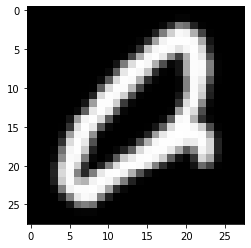

In [ ]:
test_prediction(0, W1, b1, W2, b2)